In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

In [145]:
import os
os.getcwd()

'c:\\Users\\LENOVO'

In [146]:
df = pd.read_csv("D:\\Users\\KARUNA\\Downloads\\archive (2)\\spam_ham_dataset.csv")

In [147]:
df.shape

(5171, 4)

In [148]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [149]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [151]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [152]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [153]:
X = df['text']
y = df['label_num']

In [154]:
# Check for duplicate rows
print('Duplicate rows before removal:', df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows after removal
print('Duplicate rows after removal:', df.duplicated().sum())

Duplicate rows before removal: 0
Duplicate rows after removal: 0


In [155]:
# Check for and remove any leading or trailing whitespaces in the 'text' column
if df['text'].str.contains('^\s+|\s+$').any():
    df['text'] = df['text'].str.strip()
    print('Leading and trailing whitespaces have been removed from the text column.')
else:
    print('No leading or trailing whitespaces found in the text column.')

Leading and trailing whitespaces have been removed from the text column.


In [156]:
# Check for and remove any special characters or symbols in the 'text' column
import re

# Define a function to remove special characters
pattern = r'[^a-zA-Z0-9\s]'
def remove_special_characters(text):
    return re.sub(pattern, '', text)

# Apply the function to the 'text' column
if df['text'].str.contains(pattern).any():
    df['text'] = df['text'].apply(remove_special_characters)
    print('Special characters and symbols have been removed from the text column.')
else:
    print('No special characters or symbols found in the text column.')

Special characters and symbols have been removed from the text column.


In [157]:
# Convert the 'text' column to lowercase
if df['text'].str.isupper().any():
    df['text'] = df['text'].str.lower()
    print('The text column has been converted to lowercase.')
else:
    print('The text column is already in lowercase.')

The text column is already in lowercase.


In [158]:
# Check for and remove any leading or trailing whitespaces in the 'label' column
if df['label'].str.contains('^\s+|\s+$').any():
    df['label'] = df['label'].str.strip()
    print('Leading and trailing whitespaces have been removed from the label column.')
else:
    print('No leading or trailing whitespaces found in the label column.')

No leading or trailing whitespaces found in the label column.


In [159]:
# Check for and remove any leading or trailing whitespaces in the 'label_num' column
if df['label_num'].astype(str).str.contains('^\s+|\s+$').any():
    df['label_num'] = df['label_num'].astype(str).str.strip()
    print('Leading and trailing whitespaces have been removed from the label_num column.')
else:
    print('No leading or trailing whitespaces found in the label_num column.')

No leading or trailing whitespaces found in the label_num column.


In [160]:
df['text_length'] = df['text'].apply(len)
df['text_length'].head()

0     312
1      89
2    2442
3     407
4     329
Name: text_length, dtype: int64

In [161]:
df['uppercase_words'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()))
df['uppercase_words'].head()

0    1
1    1
2    1
3    1
4    1
Name: uppercase_words, dtype: int64

In [162]:
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))
df['avg_word_length'].head()

0    4.547170
1    4.062500
2    4.017058
3    7.977273
4    4.000000
Name: avg_word_length, dtype: float64

In [163]:
df['numeric_chars'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))
df['numeric_chars'].head()

0    10
1     9
2    14
3     0
4     0
Name: numeric_chars, dtype: int64

In [164]:
df['special_char_ratio'] = df['text'].apply(lambda x: sum(not c.isalnum() for c in x) / len(x))
df['special_char_ratio'].head()

0    0.227564
1    0.269663
2    0.228501
3    0.137592
4    0.221884
Name: special_char_ratio, dtype: float64

In [165]:
from collections import Counter
words = df['text'].str.split().sum()
word_counts = Counter(words)
word_counts.most_common(10)

[('the', 25613),
 ('to', 20332),
 ('ect', 13900),
 ('and', 12815),
 ('for', 10505),
 ('of', 10167),
 ('a', 9813),
 ('you', 8159),
 ('in', 7699),
 ('on', 7308)]

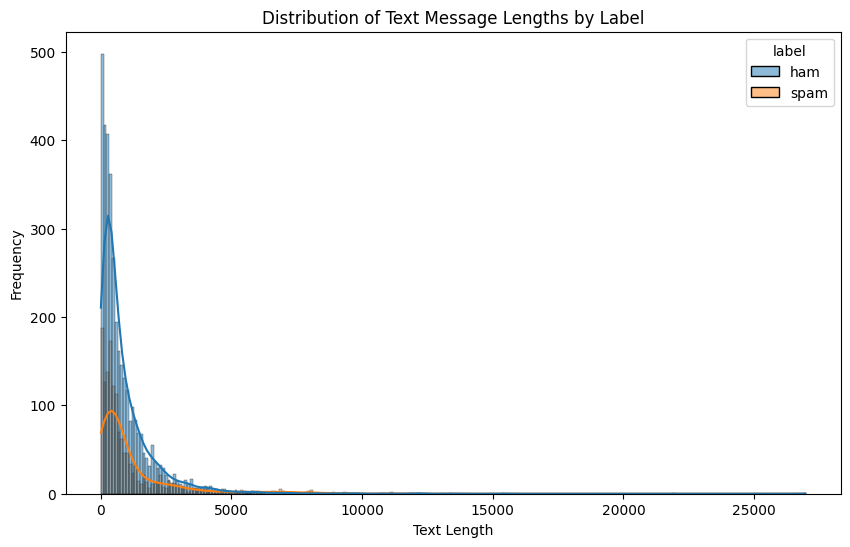

In [166]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title('Distribution of Text Message Lengths by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

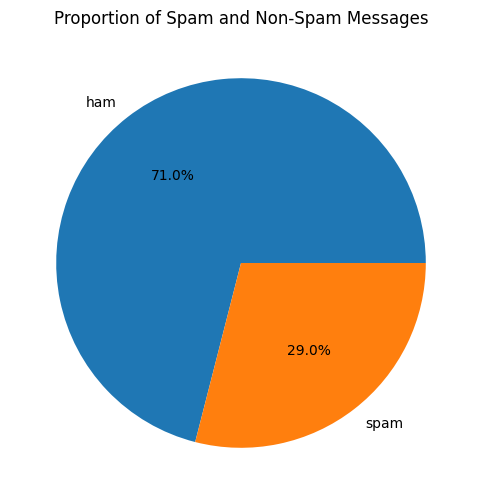

In [167]:
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Spam and Non-Spam Messages')
plt.ylabel('')
plt.show()

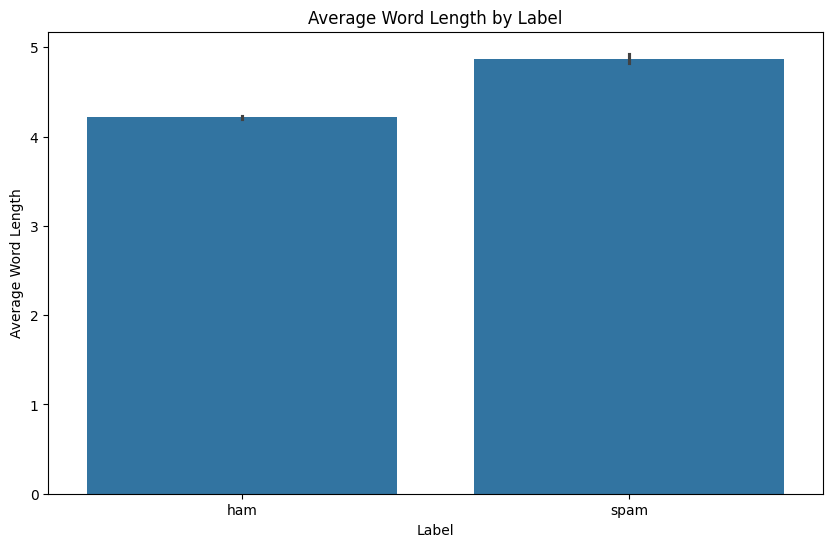

In [168]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='label', y='avg_word_length')
plt.title('Average Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Word Length')
plt.show()

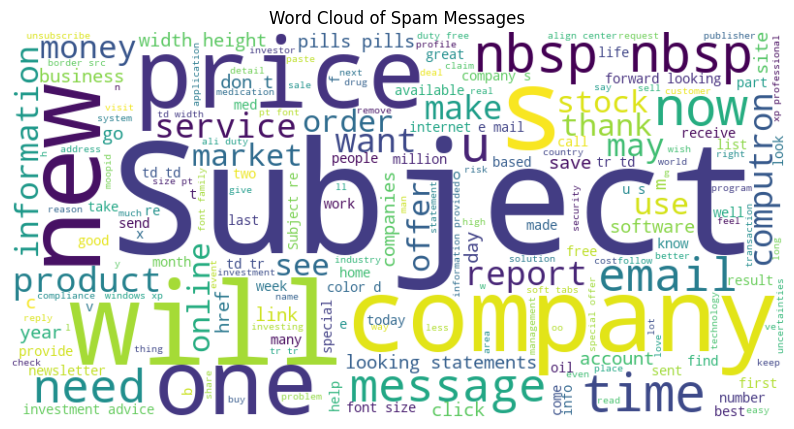

In [169]:
from wordcloud import WordCloud

spam_words = ' '.join(df[df['label'] == 'spam']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Spam Messages')
plt.show()

In [170]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
# Vectorization of the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [172]:
# Training the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [173]:
# Predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_vectorized)

In [174]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.9719806763285024

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [175]:
# Create a CountVectorizer object to convert text into vectors
vectorizer = CountVectorizer()

In [176]:
# Transform the text into numerical vectors
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [177]:
# Create a Naive Bayes model
model = MultinomialNB()

In [178]:
# Train the model on the training data
model.fit(X_train_vect, y_train)

MultinomialNB()

In [179]:
# Predict labels for the test data
y_pred = model.predict(X_test_vect)

In [180]:
# Calculate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9719806763285024


In [181]:
# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [182]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [183]:
# Extract TP, TN, FP, and FN from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

In [184]:
print("Confusion Matrix:")
print(conf_matrix)
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

Confusion Matrix:
[[729  13]
 [ 16 277]]
True Positives (TP): 277
True Negatives (TN): 729
False Positives (FP): 13
False Negatives (FN): 16


In [185]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Create a Tokenizer object to convert text into sequences of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [187]:
# Convert the text into sequences of integers
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [188]:
# Pad the sequences to obtain equal lengths
max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post')

In [189]:
def create_model(optimizer='adam', units=64, activation='relu'):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64, input_length=max_seq_length))
    model.add(GlobalAveragePooling1D())
    model.add(Dense(units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [190]:
# Define hyperparameters to test
param_grid = {'units': [32, 64, 128]}
batch_sizes = [16, 32, 64]
for batch in batch_sizes:
    print("Parameters for batch_size =", batch)

Parameters for batch_size = 16
Parameters for batch_size = 32
Parameters for batch_size = 64


In [191]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train_vect.shape[1],), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [197]:
history = model.fit(X_train_vect.toarray(), y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test_vect.toarray(), y_test_encoded))

Epoch 1/10


130/130 [==============================] - 30s 73ms/step - loss: 0.1654 - accuracy: 0.9616 - val_loss: 0.0713 - val_accuracy: 0.9865
Epoch 2/10
130/130 [==============================] - 7s 56ms/step - loss: 0.0310 - accuracy: 0.9969 - val_loss: 0.0671 - val_accuracy: 0.9874
Epoch 3/10
130/130 [==============================] - 6s 49ms/step - loss: 0.0159 - accuracy: 0.9990 - val_loss: 0.0512 - val_accuracy: 0.9874
Epoch 4/10
130/130 [==============================] - 6s 48ms/step - loss: 0.0098 - accuracy: 0.9995 - val_loss: 0.0624 - val_accuracy: 0.9874
Epoch 5/10
130/130 [==============================] - 6s 47ms/step - loss: 0.0067 - accuracy: 0.9998 - val_loss: 0.0550 - val_accuracy: 0.9874
Epoch 6/10
130/130 [==============================] - 6s 47ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0673 - val_accuracy: 0.9884
Epoch 7/10
130/130 [==============================] - 7s 54ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0670 - val_accuracy: 0.9

In [199]:
y_pred = model.predict(X_test_vect.toarray())
accuracy = accuracy_score(y_test_encoded, (y_pred > 0.5).astype(int))
auc_roc = roc_auc_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, (y_pred > 0.5).astype(int))
recall = recall_score(y_test_encoded, (y_pred > 0.5).astype(int))

accuracy, auc_roc, precision, recall

33/33 [==============================] - 1s 13ms/step


(0.9874396135265701,
 0.9961270618106216,
 0.9827586206896551,
 0.9726962457337884)

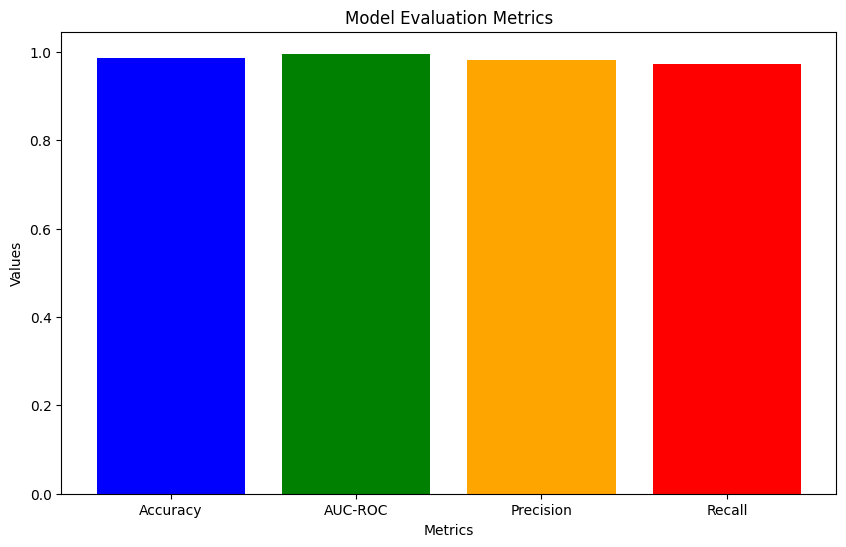

In [200]:
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall']
values = [accuracy, auc_roc, precision, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

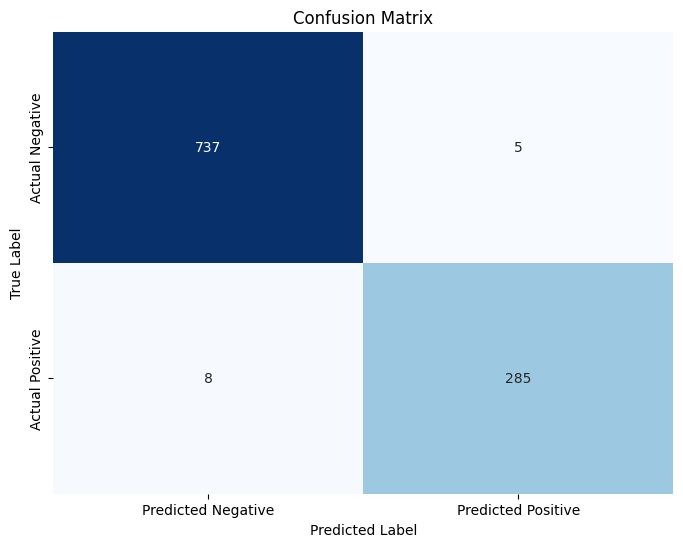

In [201]:
cm = confusion_matrix(y_test_encoded, (y_pred > 0.5).astype(int))

cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()